In [12]:
import pandas as pd
import matplotlib.pyplot as plt

import glob

import seaborn as sns

%matplotlib inline

In [8]:
df = pd.concat([pd.read_csv(f) for f in glob.glob("../data/Combined_Cycle_Power_Plant/*.csv")])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47840 entries, 0 to 9567
Data columns (total 5 columns):
AT    47840 non-null float64
V     47840 non-null float64
AP    47840 non-null float64
RH    47840 non-null float64
PE    47840 non-null float64
dtypes: float64(5)
memory usage: 2.2 MB


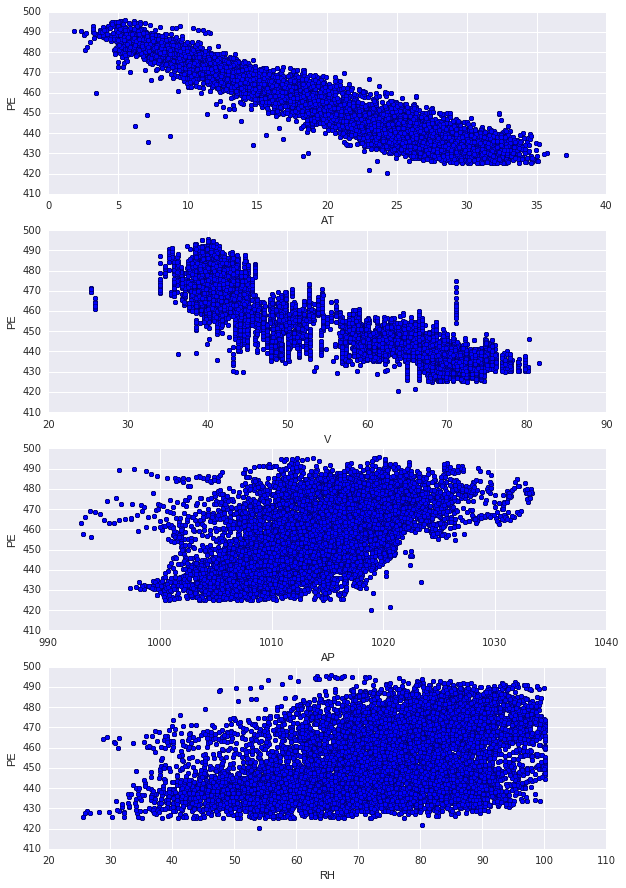

In [113]:
plt.figure(figsize=(10, 15))
for i, v in enumerate(["AT", "V", "AP", "RH"]):
    plt.subplot(4, 1, i + 1)
    plt.scatter(df[v], df["PE"])
    plt.xlabel(v)
    plt.ylabel("PE")

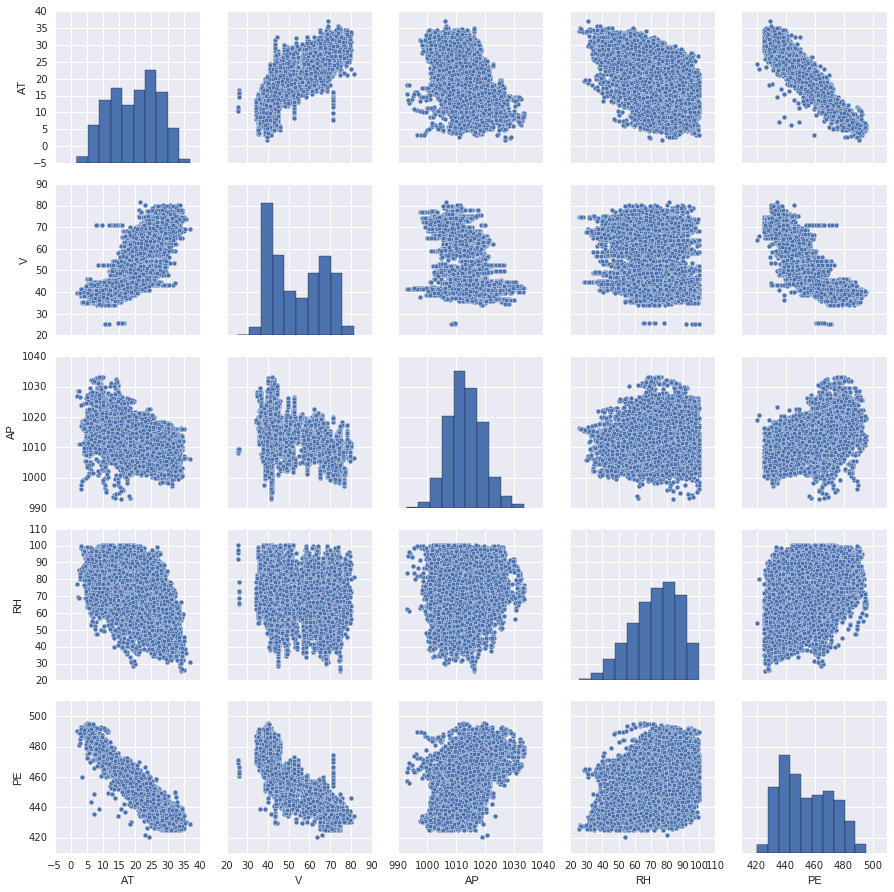

In [134]:
sns.pairplot(df)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
import numpy as np

In [41]:
np.random.seed(100)
np.random.random(5)

array([ 0.54340494,  0.27836939,  0.42451759,  0.84477613,  0.00471886])

In [42]:
df.sample(10)

,AT,V,AP,RH,PE
4077,19.54,54.90,1017.15,70.37,455.86
425,21.09,46.63,1013.03,74.80,453.34
9118,29.39,69.89,1013.92,47.36,434.27
8605,19.15,39.72,1001.49,58.62,457.45
8246,21.84,58.86,1014.13,69.67,445.16
9021,15.12,52.05,1014.63,80.38,464.78
448,29.12,51.43,1005.93,60.66,437.71
5304,19.75,49.02,1009.38,92.89,446.63
4110,23.73,63.94,1010.70,87.10,441.78
3745,26.38,71.58,1011.02,80.90,434.26


In [48]:
y = df["PE"].values
type(y)

numpy.ndarray

In [53]:
X = df.iloc[:, 0].values.reshape(-1, 1)
X.shape

(47840, 1)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 100)

In [57]:
X_train.shape, y_train.shape

((33488, 1), (33488,))

In [58]:
X_test.shape, y_test.shape

((14352, 1), (14352,))

In [60]:
14352 / (14352 + 33488)

0.3

In [61]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
lr.intercept_, lr.coef_

(497.09394395697325, array([-2.17446537]))

PE = 497.09394395697325 -2.17446537 * AT

In [66]:
y_test_pred = lr.predict(X_test)

In [68]:
output = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

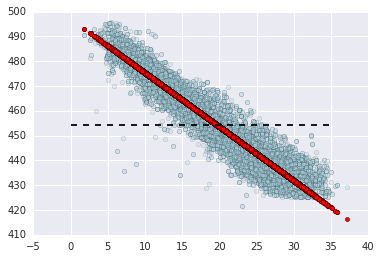

In [92]:
plt.scatter(X_test[:, 0], y_test, alpha = 0.3, c = "lightblue")
plt.scatter(X_test[:, 0], y_test_pred, c = "red")
plt.hlines([mu], xmin=0, xmax=35, linestyles = "--")


In [80]:
sorted(X_test[:, 0])[::-1][:3]

[37.109999999999999, 35.770000000000003, 35.770000000000003]

In [88]:
ssr = ((y_test_pred - y_test) ** 2).sum()
ssr

423613.9139175131

In [85]:
mu = y_train.mean()
mu

454.39998059006206

In [100]:
sst = ((y_test_pred - mu) ** 2).sum()
sst

3774789.5262649273

In [101]:
ssr / sst

0.11222186322442987

In [94]:
mssr = ssr / y_test.shape[0]
mssr

29.516019643082018

In [104]:
r2 = 1 - ssr / sst
r2
# r2 can have a max value 1, negative values of R2 means optimal model 

0.88777813677557016

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
mean_squared_error(y_test, y_test_pred)

29.516019643082018

In [107]:
r2_score(y_test, y_test_pred) ## testing set R2

0.89821523063289865

In [105]:
ssr = ((y_test_pred - y_test) ** 2).sum()
sst = ((y_test_pred - y_test.mean()) ** 2).sum()

1 - ssr/sst

0.88777167951834757

In [106]:
r2_score(y_train, lr.predict(X_train)) #training set R2

0.89925540345319965

In [128]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_, lr.coef_)


452.138056581 [-1.97941445 -0.23293861  0.06456185 -0.15832184]


In [129]:
pd.DataFrame({"column": df.columns[:-1], "coef": lr.coef_[0]})

,coef,column
0,-1.979414,AT
1,-1.979414,V
2,-1.979414,AP
3,-1.979414,RH


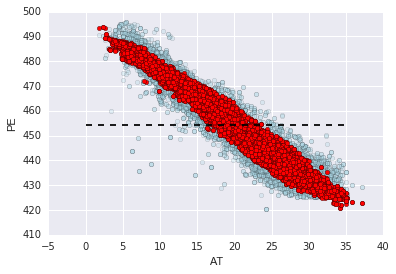

In [130]:
y_test_pred = lr.predict(X_test)
plt.scatter(X_test[:, 0], y_test, alpha = 0.3, c = "lightblue")
plt.scatter(X_test[:, 0], y_test_pred, c = "red")
plt.hlines([mu], xmin=0, xmax=35, linestyles = "--")
plt.xlabel("AT")
plt.ylabel("PE")

In [132]:
y_test_pred = lr.predict(X_test)
pd.DataFrame({"actual": y_test, "pred": y_test_pred})

,actual,pred
0,441.51,436.104548
1,439.36,442.626400
2,448.76,446.782110
3,481.87,476.561808
4,448.67,443.989309
5,455.64,459.214455
6,472.50,470.050202
7,444.60,447.871444
8,453.28,450.054767
9,426.47,430.023567


In [133]:
mean_squared_error(y_test, y_test_pred)

21.727677022793074

In [126]:
y_test.shape

(14352, 1)